In [1]:
#imports

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#values

fs = 20e6  # sampling rate
N = 1e5  # number of samples

m = 300  # chirp slope
b = 1  # chirp initial (angular) frequency

t = np.arange(N) / float(fs) # make an array out of all samples
w = m * t + b # variable for frequency related to time
tx = np.cos(w * fs * t) # chirp signal
tx[int(len(tx) / 2) :] = 0 # sample over time

d = 100e3  # m                distance from transmitter
c = 3e8  # m/s

delay_s = 2 * d / c # delay in seconds (tau)
delay_samps = int(delay_s * fs) # sample over time

rx = np.roll(tx, delay_samps) # define rx as tx but delayed

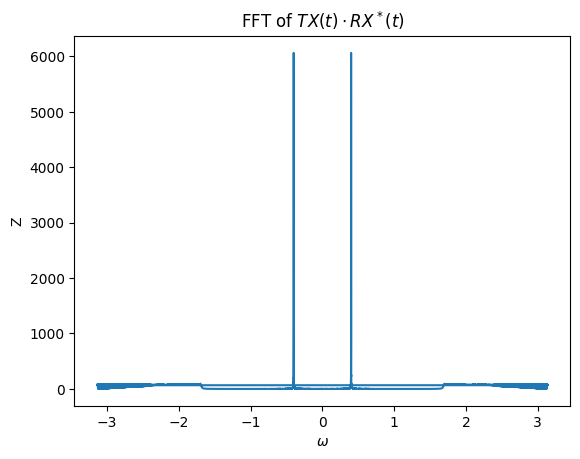

In [3]:
z = tx * np.conj(rx) # multiply tx by the complex conjugate

freq = np.fft.fftfreq(z.shape[-1]) # take fourier transform of tx x rx*
omega = 2 * np.pi * freq # definition of omega
win = np.hanning(len(z)) # hanning window - smooth the values
Z = np.fft.fft(win * z) # take FFT of hanning window

plt.plot(omega, np.abs(Z))
plt.xlabel("$\omega$")
plt.ylabel("Z")
plt.title("FFT of $TX(t) \cdot RX^*(t)$")
plt.show()

Suppose we have signals TX (send) and RX (recieve), where RX is TX shifted by some phase shift tau. We take TX multiplied by RX* (compelex conjugate of RX), the product we will call z, and due to the nature of the signals, that must be a pure sinusoid with a single frequency w1. We take the fourier transform of that sinusoid, and get that max value to find the frequency w1. By definition (by math), tau = 2 w1 m. We solve for tau, and then we use speed of light to solve for d.

In [5]:
w_1 = abs(omega[np.argmax(np.abs(Z))]) # moyai
tau_est = w_1 / (2 * m)
d_est = c * tau_est / 2

d_est

99996.89416376314